# 1. Perkenalan
---

Nama : Venu Fitratama

Batch : FTDS-016-RMT

Dataset : 
>https://www.kaggle.com/datasets/dineshmanikanta/machine-failure-predictions?select=machine+failure.csv

Objective :
- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

---
# 2. Import Libraries
---

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [526]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split 
from feature_engine.outliers import Winsorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

import pickle

---
# 3. Data Loading
---

In [527]:
#data import
df2 = pd.read_csv('machine_failure.csv')
#data duplicate
df = df2.copy()

#menampilkan head-tail dataset
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [529]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Dataset terdiri atas 10.000 baris dengan 10 kolom. Tidak ditemukan adanya missing values pada dataset berikut.
Terdapat 3 object, 3 data float, dan 4 data integer pada dataset, artinya terdapat kategorikal dan juga numerikal kolom pada dataset.

Deskripsi kolom:
- UDI : Indeks dari 1-10000
- Product ID : Variasi tiap-tiap produk (setiap produk berbeda)
- Type : Tipe dari produk L (low), M (Medium), H (high)
- Air temperature : suhu udara dalam satuan K (Kelvin)
- Process temperature : suhu proses dalam satuan K (Kelvin)
- Rotational speed : kecepatan rotasi dalam satuan rpm
- Torque : besar torsi dalam satuan newton meter (NM)
- Tool wear : keausan pahat
- Failure Type (Target) : Terjadi kegagalan atau tidak (0= no, 1= yes)

In [530]:
#rename columns
df.rename(columns={
    "Product ID": "Product_ID",
    "Type": "type", 
    "Air temperature [K]": "air_temperature", 
    "Process temperature [K]": "process_temperature", 
    "Rotational speed [rpm]": "RPM", 
    "Torque [Nm]": "torque", 
    "Tool wear [min]": "tool_wear", 
    "Machine failure": "target"}, inplace=True)

#drop column
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

---
# 4. Exploratory Data Analysis (EDA)
---

In [531]:
#melihat nilai unik dari kolom
print('Type')
print(df.type.unique())
print('')
print('Target')
print(df.target.unique())

Type
['M' 'L' 'H']

Target
[0 1]


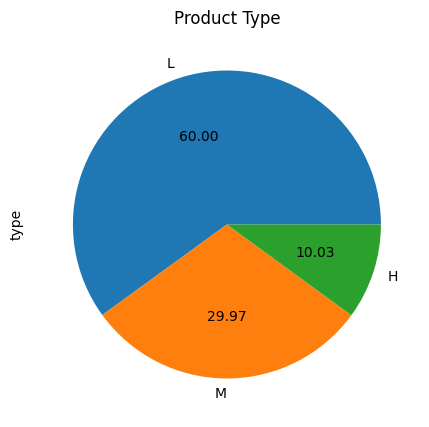

In [532]:
#piechart untuk melihat persebaran type produk
df['type'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f')
plt.title('Product Type')
plt.show()

Produk dengan type Low memilihi persentase terbanyak, disusul dengan produk Medium dan produk High.

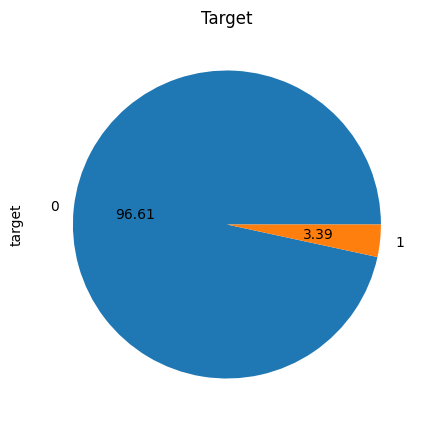

In [533]:
#piechart untuk melihat persebaran Target
df['target'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f')
plt.title('Target')
plt.show()

Terget data sangat timpang, dimana target (failure type) dengan label 0 (no) mempunyai persebaran sebanyak 96.61%, sedangkan label 1 (yes) hanya 3.39%. Dataset termasuk data imbalance yang sangat ekstrim menurut perbandingan persebarannya, maka dari itu diperlukan balancing data nantinya.

type  target
H     0          982
      1           21
L     0         5765
      1          235
M     0         2914
      1           83
Name: target, dtype: int64


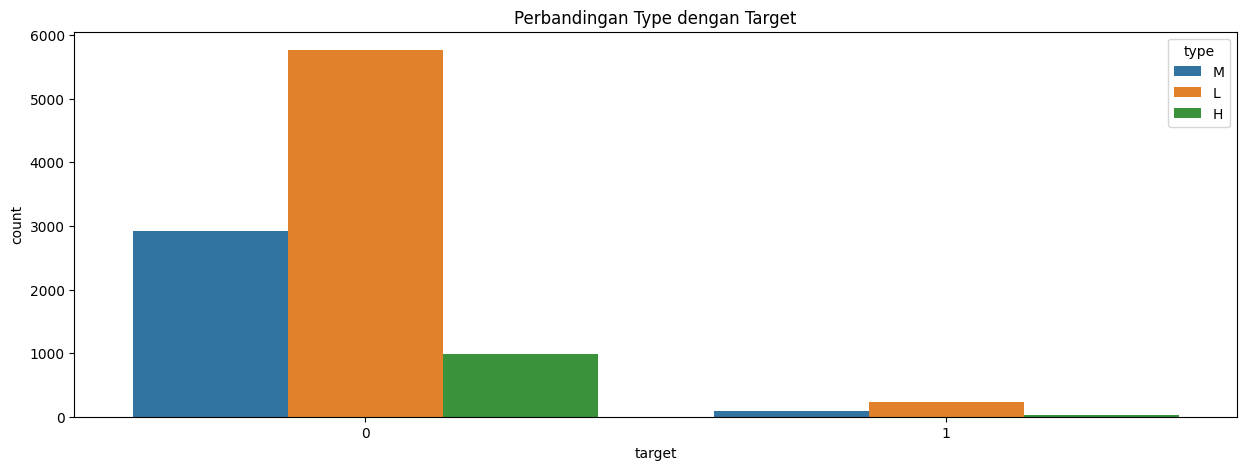

In [534]:
# jumlah perbandingan tipe berdasarkan target 
print(df.groupby('type')['target'].value_counts())

# plot perbandingan tipe berdasarkan target
plt.figure(figsize=(15,5))
sns.countplot(data=df, x=df['target'], hue=df['type'])
plt.title('Perbandingan Type dengan Target')
plt.show()

Walaupun persebaran terjadinya machine failure sangat kecil, namun semua tipe mempunyai kondisi terjadinya machine failure.

In [535]:
encoder = OrdinalEncoder()
#Encoding agar semua data dapat terbaca pada heatmap, 
#digunakan ordinal sebab data tidak berjenis klasifikasi.

#fit dan transform
encoded = encoder.fit_transform(df)

#membuat dataframe
encoded_df = pd.DataFrame(encoded, columns= df.columns)

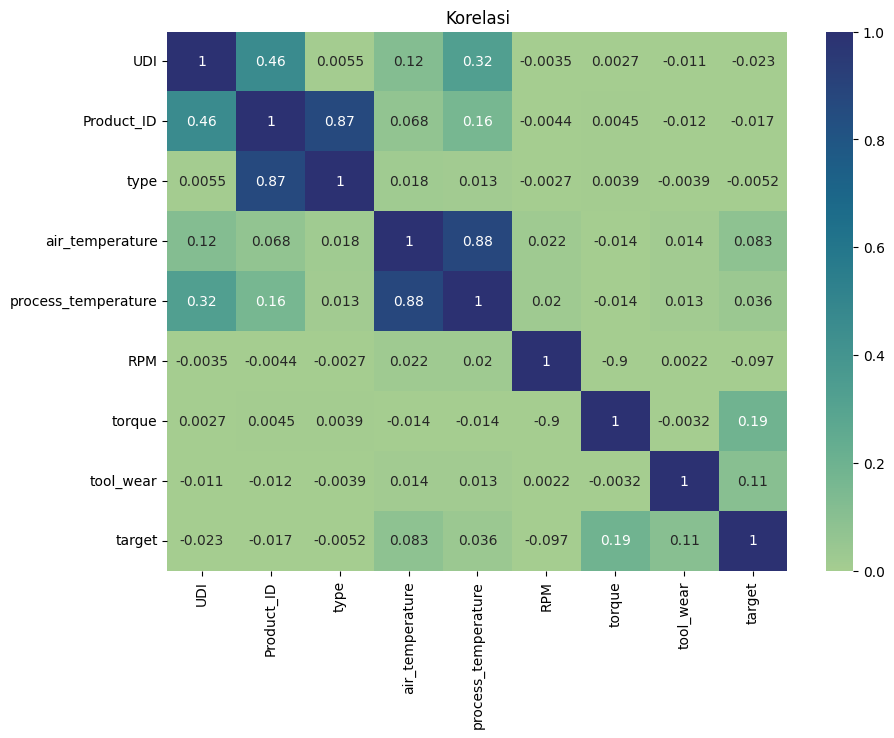

In [536]:
# cek korelasi 
corr = encoded_df.corr()

# buat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot= True, vmin=0, vmax=1, cmap='crest')
plt.title('Korelasi')
plt.show()

Berdasarkan heatmap, dapat disimpulkan bahwa:
- Fitur yang memiliki korelasi yang tinggi terhadap target adalah `torque` dan `tool_wear`.
- `air_temperature` dan `process_temperature` memiliki korelasi yang lumayan tinggi, hanya akan dipilih salah satu pada kedua kolom tersebut.
- `product_ID` dan `type` juga mempunyai korelasi yang tinggi antar satu dan lainnya, namun setiap data memiliki type dan ID yang berbeda-beda sehingga tidak berpengaruh apapun pada target.

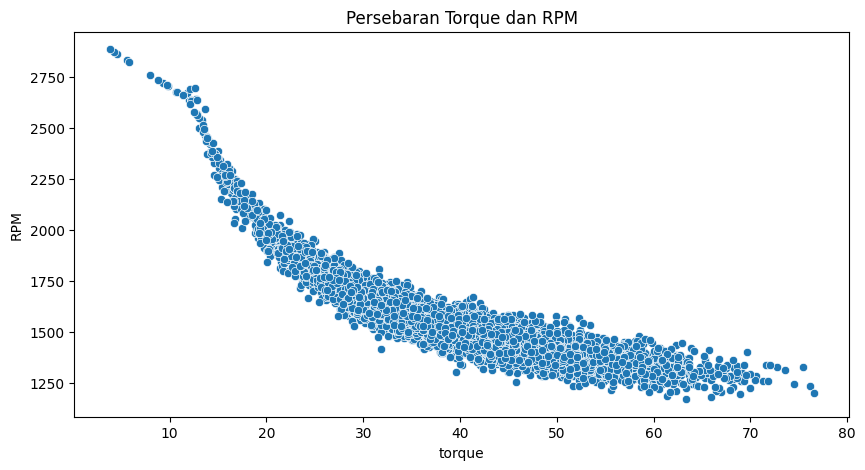

In [537]:
# hubungan antara torsi dan kecepatan putaran
plt.figure(figsize=(10,5))
sns.scatterplot(x='torque',y='RPM',data=df)
plt.title('Persebaran Torque dan RPM')
plt.show()

---
# 5. Data Preprocessing
---

**Data Inference**

In [538]:
#mengambil 50 data inf
data_inf = df.sample(5, random_state=7)

#menghapus data inference dari dataset
df = df.drop(data_inf.index)

#reset index dataset
df.reset_index(drop=True, inplace=True)

#reset index data inference
data_inf.reset_index(drop=True, inplace=True)

#display data-inf
data_inf

,UDI,Product_ID,type,air_temperature,process_temperature,RPM,torque,tool_wear,target
0,1978,M16837,M,298.1,307.7,1633,30.7,145,0
1,3881,L51060,L,302.5,311.6,1595,29.5,35,0
2,53,H29466,H,298.8,309.0,1497,43.8,147,0
3,2552,L49731,L,299.3,309.2,1541,37.2,118,0
4,2247,L49426,L,299.3,308.4,1406,47.4,3,0


**Split Data**

In [539]:
#fitur (X)
X = df.drop('target', axis=1)

#target (y)
y = df['target']

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Dataset Size  :", df.shape)
print("X-Train Size   : ", X_train.shape)
print("X-Test Size    : ", X_test.shape)

Dataset Size  : (9995, 9)
X-Train Size   :  (7996, 8)
X-Test Size    :  (1999, 8)


Dilakukan pengambilan umum sebanyak 20% test dan 80% test-train dataset agar 'machine' dapat 'belajar' untuk melakukan prediksi.

Didapatlah 7.960 data train dan 1.990 data test.

**Missing Values Handling**

In [541]:
#Memastikan ulang tidak ada missing values pada data
print('Missing values X-train:', X_train.isnull().sum().sum())
print('Missing values X-test :', X_test.isnull().sum().sum())
print('Missing values y-train:', y_train.isnull().sum().sum())
print('Missing values y-test :', y_test.isnull().sum().sum())

Missing values X-train: 0
Missing values X-test : 0
Missing values y-train: 0
Missing values y-test : 0


**Outlier Handling**

In [542]:
#Fungsi pemanggilan histplot - untuk melihat persebaran data
def hist_box(df, variable):
    plt.figure(figsize=(15, 5))

    #histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

In [543]:
df.head(2)

,UDI,Product_ID,type,air_temperature,process_temperature,RPM,torque,tool_wear,target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0


Air Temperature


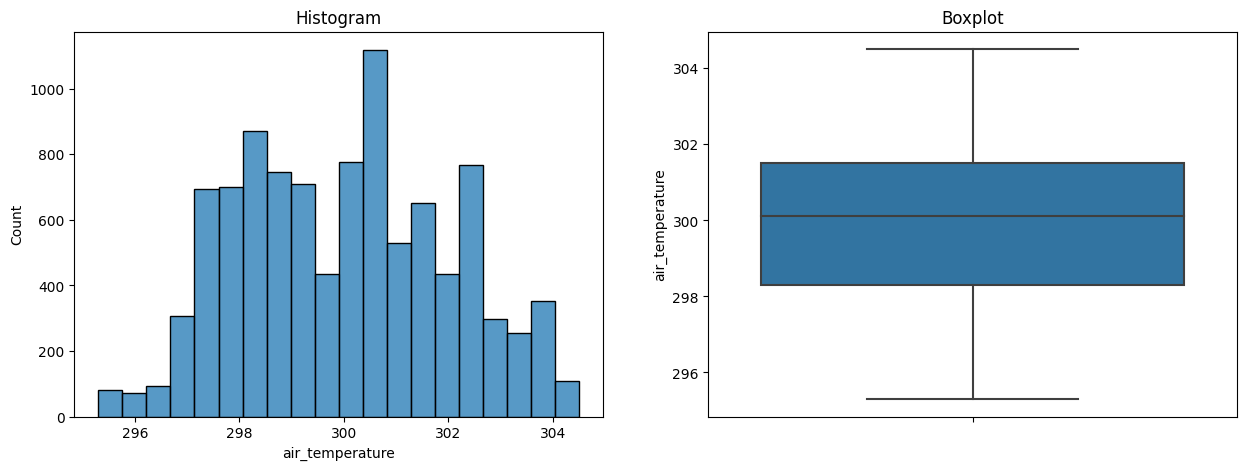

air_temperature skewness value :  0.11391708661174213

Process Temperature


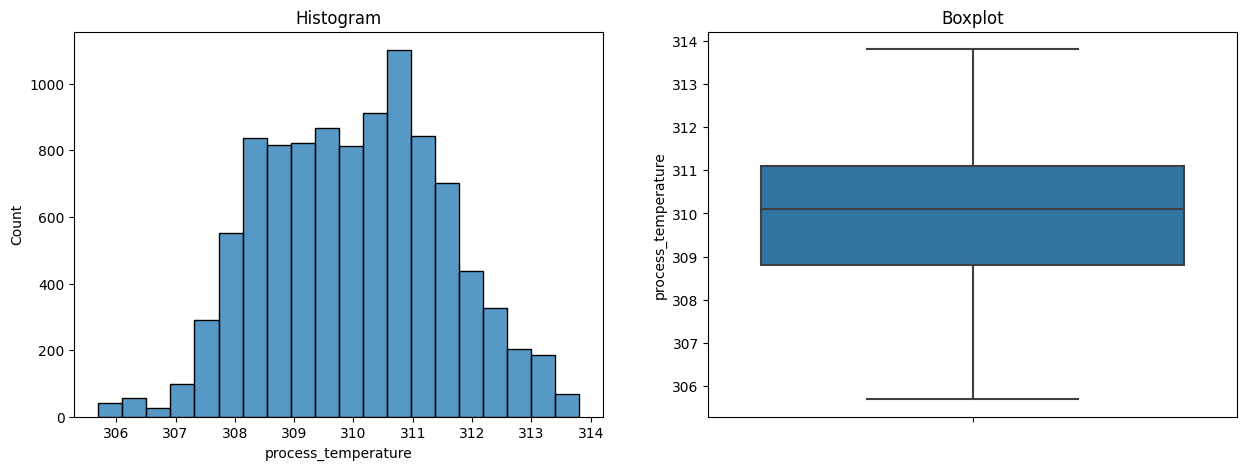

process_temperature skewness value :  0.014626006113201346

RPM


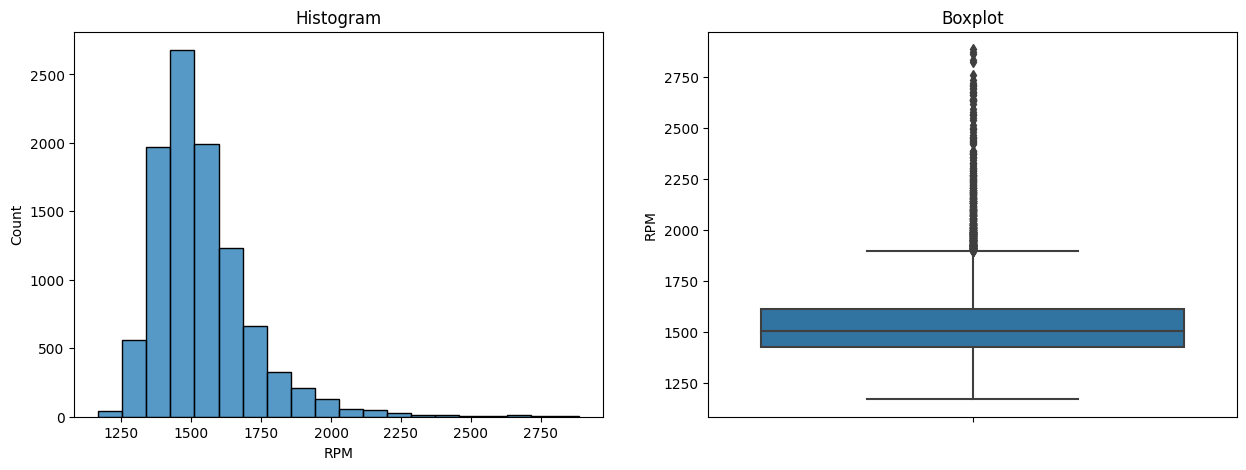

RPM skewness value :  1.992952691793919

Torque


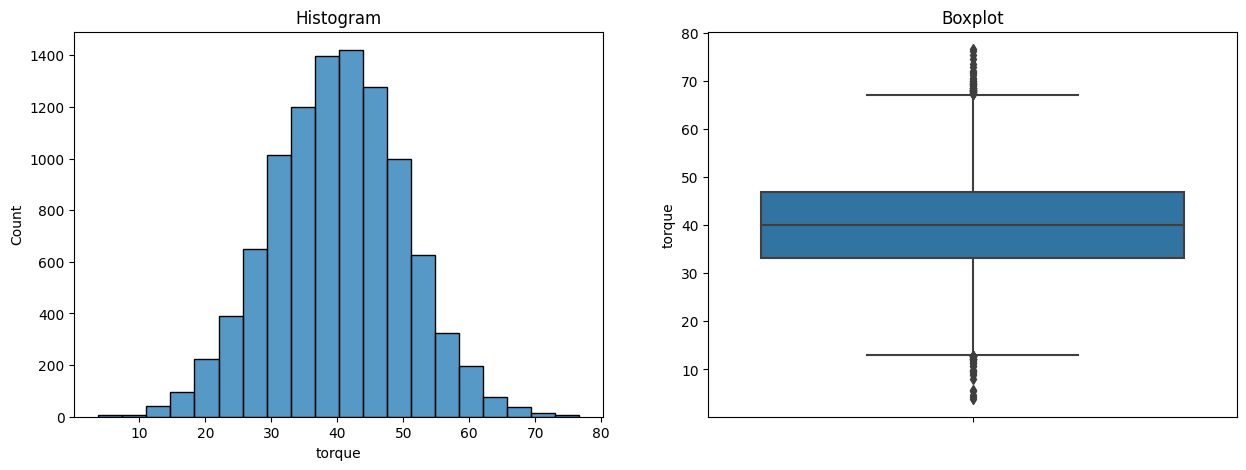

torque skewness value :  -0.00970664410644916

Tool Wear


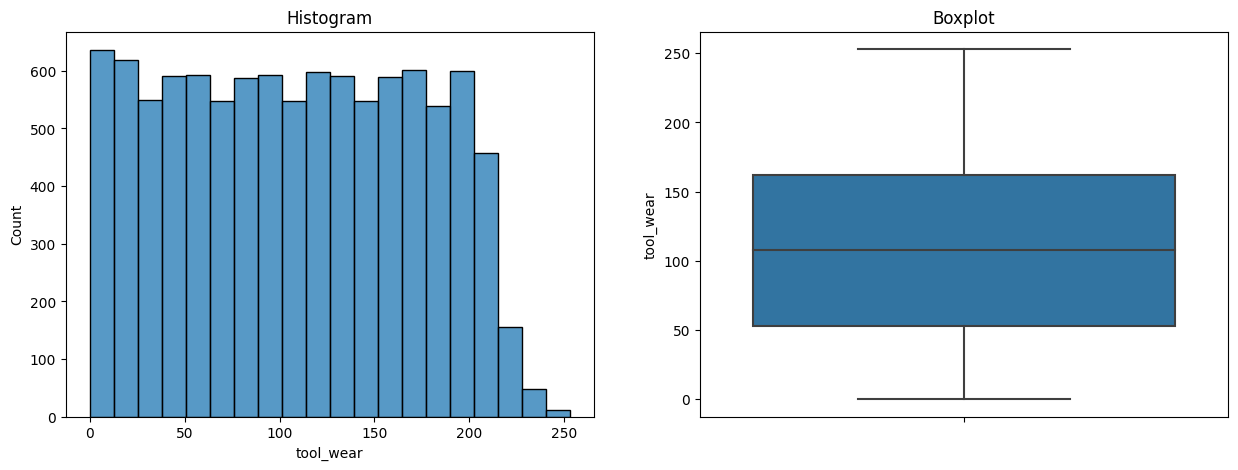

tool_wear skewness value :  0.027428189329596533



In [544]:
print('Air Temperature')
hist_box(df, 'air_temperature')
print('')
print('Process Temperature')
hist_box(df, 'process_temperature')
print('')
print('RPM')
hist_box(df, 'RPM')
print('')
print('Torque')
hist_box(df, 'torque')
print('')
print('Tool Wear')
hist_box(df, 'tool_wear')
print('')

Terdapat outlier pada `RPM` dan `Torque`, maka akan dilakukan outlier handling pada 2 variabel ini.

In [545]:
# membuat capper
windsoriser = Winsorizer(capping_method='gaussian', tail='both', fold=1.5, variables=['RPM', 'torque'])

# fit dan transform data
X_train_capped = windsoriser.fit_transform(X_train)

RPM


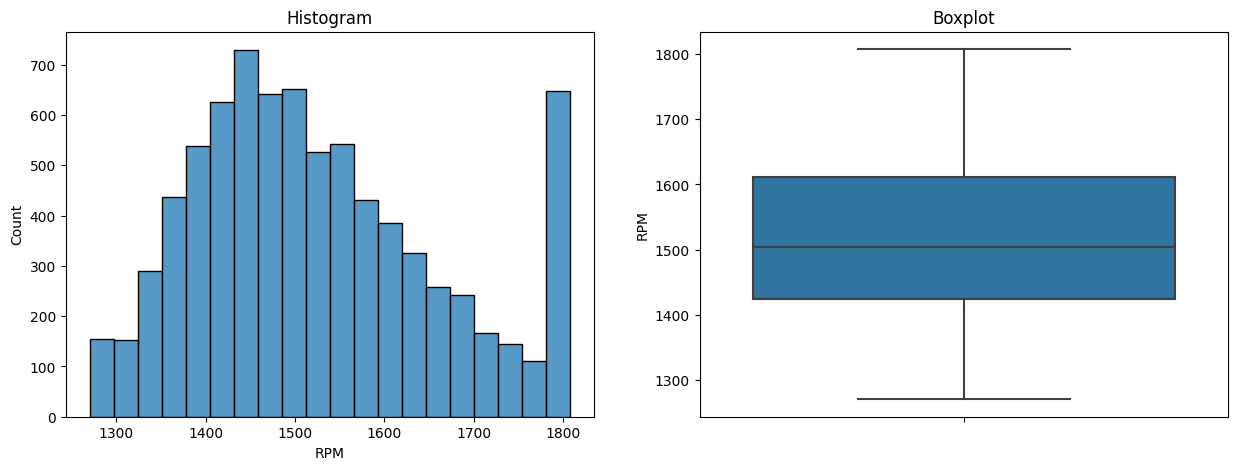

RPM skewness value :  0.504777098223378

Torque


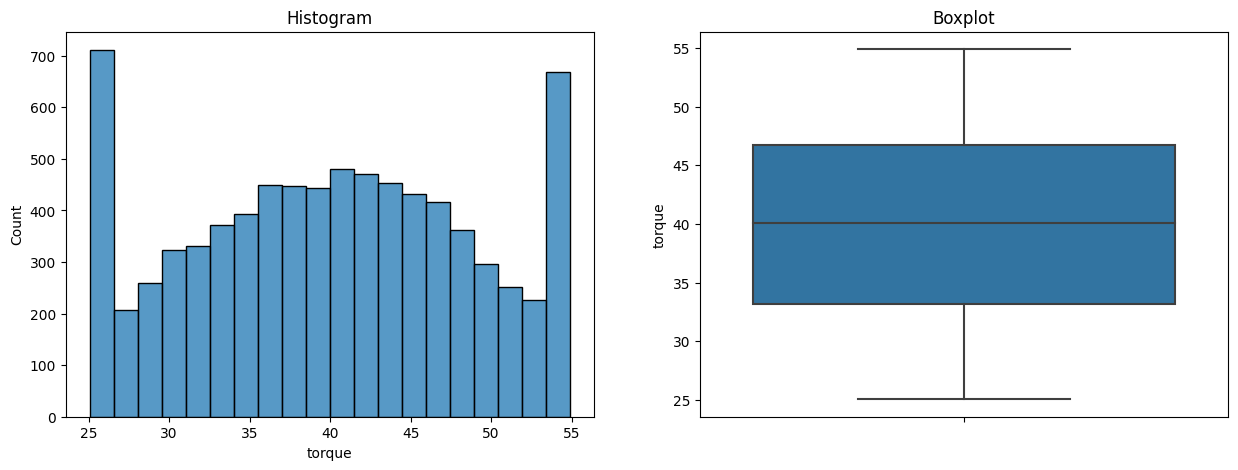

torque skewness value :  -0.022412340204478895


In [546]:
print('RPM')
hist_box(X_train_capped, 'RPM')
print('')
print('Torque')
hist_box(X_train_capped, 'torque')

setelah dilakukan outlier handling, Skewness dari `RPM` yang awalnya skewed menjadi normal

**Feature Selection**

In [547]:
X_train_capped

,UDI,Product_ID,type,air_temperature,process_temperature,RPM,torque,tool_wear
3922,3928,H33341,H,302.7,311.5,1556.000000,35.000000,164
1123,1125,M15984,M,296.7,307.8,1270.142732,54.898935,105
5397,5403,L52582,L,302.7,312.3,1421.000000,48.500000,0
5173,5179,H34592,H,304.0,313.2,1517.000000,43.100000,96
8971,8977,L56156,L,296.7,307.4,1535.000000,34.600000,114
...,...,...,...,...,...,...,...,...
2895,2900,L50079,L,300.6,309.4,1410.000000,40.600000,99
7813,7819,L54998,L,299.8,311.2,1807.704941,25.065222,144
905,907,M15766,M,295.6,306.1,1462.000000,49.200000,158
5192,5198,H34611,H,303.8,312.9,1570.000000,35.800000,147


Menurut pendapat saya pribadi setelah dilakukan eksplorasi, UDI & Product ID tidak berpengaruh pada target, sehingga akan di drop.

Antara process temperature dan air temperature, process temperature akan dipilih sebab persebarannya jauh lebih normal dibandingkan dengan air temperature.

In [548]:
# Drop column yang tidak digunakan pada X-train
X_train_capped.drop(['UDI', 'Product_ID', 'type', 'air_temperature'],axis=1, inplace=True)

# Drop column yang tidak digunakan pada X-test
X_test.drop(['UDI', 'Product_ID', 'type','air_temperature'],axis=1, inplace=True)

In [549]:
X_train_capped

,process_temperature,RPM,torque,tool_wear
3922,311.5,1556.000000,35.000000,164
1123,307.8,1270.142732,54.898935,105
5397,312.3,1421.000000,48.500000,0
5173,313.2,1517.000000,43.100000,96
8971,307.4,1535.000000,34.600000,114
...,...,...,...,...
2895,309.4,1410.000000,40.600000,99
7813,311.2,1807.704941,25.065222,144
905,306.1,1462.000000,49.200000,158
5192,312.9,1570.000000,35.800000,147


**Feature Scaling**

In [550]:
scaler = StandardScaler()

# fit & transform X-train dan X-test
X_train_final = scaler.fit_transform(X_train_capped)
X_test_final = scaler.transform(X_test)

**Imbalance Handling**

In [551]:
smote = SMOTE(k_neighbors=5, random_state=7, sampling_strategy='all')

#resampling
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test_final, y_test)

#size checking
print(y_train_balanced.value_counts())
print(y_test_balanced.value_counts())

0    7715
1    7715
Name: target, dtype: int64
0    1941
1    1941
Name: target, dtype: int64


---
# 6. Model Definition
---

In [552]:
from sklearn.ensemble import RandomForestClassifier

In [553]:
#model logistic regression
logreg = LogisticRegression()


#model KNN
knn = KNeighborsClassifier()

#model Naive Bayes
nb = GaussianNB()

#model Random Forest
rf = RandomForestClassifier()

In [554]:
#Logistic Regression
param_logreg = {
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [50, 100, 150]}

# gridseacrh dengan cross validation 5 kali
logreg_grid = GridSearchCV(logreg, param_logreg, cv=5, scoring='accuracy', return_train_score=True)

In [555]:
#KNeighbors
param_knn = {'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree'],
            'leaf_size': [10, 20, 30]}

# gridseacrh dengan cross validation 5 kali
knn_grid = GridSearchCV(knn, param_knn, cv=5, scoring='accuracy', return_train_score=True)

In [556]:
#Naive Bayesian
param_nb = {'var_smoothing' : [0.01, 0.1, 1]}

# gridseacrh dengan cross validation 5 kali
nb_grid = GridSearchCV(nb, param_nb, cv=5, scoring='accuracy', return_train_score=True)

In [557]:
#Random Forest
param_rf = {'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [3, 5]}

# gridseacrh dengan cross validation 5 kali
rf_grid = GridSearchCV(rf, param_rf, cv=5, scoring='accuracy', return_train_score=True)

---
# 7. Model Training
---

In [558]:
#Logistic Regression
logreg_grid.fit(X_train_balanced, y_train_balanced)

#Mencari estimator terbaik
logreg_best = logreg_grid.best_estimator_
print(logreg_best)

LogisticRegression(max_iter=50, penalty='l1', solver='liblinear')


In [559]:
#KNeighbors
knn_grid.fit(X_train_balanced, y_train_balanced)

#Mencari estimator terbaik
knn_best = knn_grid.best_estimator_
print(knn_best)

KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')


In [560]:
#Naive Bayes
nb_grid.fit(X_train_balanced, y_train_balanced)

#Mencari estimator terbaik
nb_best = nb_grid.best_estimator_
print(nb_best)

GaussianNB(var_smoothing=0.01)


In [561]:
#Random Forest
rf_grid.fit(X_train_balanced, y_train_balanced)

#Mencari estimator terbaik
rf_best = rf_grid.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=5, min_samples_split=5)


---
# 8. Model Evaluation
---

**Logistic Regression**

In [562]:
y_pred_train_logreg = logreg_best.predict(X_train_balanced)
y_pred_test_logreg = logreg_best.predict(X_test_balanced)

In [563]:
#Confusion Matrix
print('Hasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_logreg))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_logreg))

Hasil prediksi train-set
[[5623 2092]
 [2059 5656]]

Hasil prediksi test-set
[[1390  551]
 [ 458 1483]]


In [564]:
print('Prediksi train-set Benar : ', (5568+5654)/15384)
print('Prediksi train-set Salah : ', (2038+2124)/15384)
print('')
print('Prediksi test-set Benar : ', (1341+1462)/3840)
print('Prediksi test-set Salah : ', (458+579)/3840)

Prediksi train-set Benar :  0.7294591783671347
Prediksi train-set Salah :  0.2705408216328653

Prediksi test-set Benar :  0.7299479166666667
Prediksi test-set Salah :  0.27005208333333336


In [565]:
#Classification Report
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_logreg))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7715
           1       0.73      0.73      0.73      7715

    accuracy                           0.73     15430
   macro avg       0.73      0.73      0.73     15430
weighted avg       0.73      0.73      0.73     15430


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1941
           1       0.73      0.76      0.75      1941

    accuracy                           0.74      3882
   macro avg       0.74      0.74      0.74      3882
weighted avg       0.74      0.74      0.74      3882



Dari tingkat akurasi, macro average, maupun weighted average nilai dari model dapat dikatakan baik sebab tidak ada perbedaan signifikan antara train maupun test. begitu pula antara label 0 dan label 1.

**KNN**

In [566]:
y_pred_train_knn = knn_best.predict(X_train_balanced)
y_pred_test_knn = knn_best.predict(X_test_balanced)

In [567]:
#Confusion Matrix
print('Hasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_knn))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_knn))

Hasil prediksi train-set
[[7715    0]
 [   1 7714]]

Hasil prediksi test-set
[[1737  204]
 [ 973  968]]


In [568]:
print('Prediksi train-set Benar : ', (7692+7690)/15384)
print('Prediksi train-set Salah : ', (2+0)/15384)
print('')
print('Prediksi test-set Benar : ', (1746+1087)/3840)
print('Prediksi test-set Salah : ', (833+174)/3840)

Prediksi train-set Benar :  0.999869994799792
Prediksi train-set Salah :  0.00013000520020800833

Prediksi test-set Benar :  0.7377604166666667
Prediksi test-set Salah :  0.26223958333333336


In [569]:
#Classification Report
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_knn))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7715
           1       1.00      1.00      1.00      7715

    accuracy                           1.00     15430
   macro avg       1.00      1.00      1.00     15430
weighted avg       1.00      1.00      1.00     15430


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.64      0.89      0.75      1941
           1       0.83      0.50      0.62      1941

    accuracy                           0.70      3882
   macro avg       0.73      0.70      0.68      3882
weighted avg       0.73      0.70      0.68      3882



Dari tingkat akurasi, macro average, maupun weighted average nilai dari model dapat dikatakan kurang baik sebab perbedaan yang cukup tinggi antara train set dan test set, dimana pada ketiga label terdapat selisih sebesar 16-17% sehingga model tidak dapat dikatakan goodfit.

kemungkinan yang terjadi adalah model telah mempelajari data dengan baik, oleh karena itu hasil train dapat dikatakan sangat baik, namun lupa secara general sehingga hasil test cukup berbeda.

**Naive Bayes**

In [570]:
y_pred_train_nb = nb_best.predict(X_train_balanced)
y_pred_test_nb = nb_best.predict(X_test_balanced)

In [571]:
#Confusion Matrix
print('Hasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_nb))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_nb))

Hasil prediksi train-set
[[5673 2042]
 [1330 6385]]

Hasil prediksi test-set
[[1393  548]
 [ 219 1722]]


In [572]:
print('Prediksi train-set Benar : ', (5604+6295)/15384)
print('Prediksi train-set Salah : ', (1397+2088)/15384)
print('')
print('Prediksi test-set Benar : ', (1375+1781)/3840)
print('Prediksi test-set Salah : ', (139+545)/3840)

Prediksi train-set Benar :  0.7734659386375455
Prediksi train-set Salah :  0.2265340613624545

Prediksi test-set Benar :  0.821875
Prediksi test-set Salah :  0.178125


In [573]:
#Classification Report
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_nb))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_nb))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      7715
           1       0.76      0.83      0.79      7715

    accuracy                           0.78     15430
   macro avg       0.78      0.78      0.78     15430
weighted avg       0.78      0.78      0.78     15430


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1941
           1       0.76      0.89      0.82      1941

    accuracy                           0.80      3882
   macro avg       0.81      0.80      0.80      3882
weighted avg       0.81      0.80      0.80      3882



Dari tingkat akurasi, macro average, maupun weighted average nilai dari model dapat dikatakan baik sebab tidak ada perbedaan signifikan antara train maupun test. begitu pula antara label 0 dan label 1. adapun selisih yang didapat adalah 5%.

secara general, model naive bayes lebih baik dibandingkan dengan logistic regression

**Random Forest**

In [574]:
y_pred_train_rf = rf_best.predict(X_train_balanced)
y_pred_test_rf = rf_best.predict(X_test_balanced)

In [575]:
#Confusion Matrix
print('Hasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_rf))
print('')
print('Hasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_rf))

Hasil prediksi train-set
[[6349 1366]
 [ 195 7520]]

Hasil prediksi test-set
[[1569  372]
 [ 158 1783]]


In [576]:
print('Prediksi train-set Benar : ', (6410+7454)/15384)
print('Prediksi train-set Salah : ', (238+1282)/15384)
print('')
print('Prediksi test-set Benar : ', (1599+1667)/3840)
print('Prediksi test-set Salah : ', (253+321)/3840)

Prediksi train-set Benar :  0.9011960478419136
Prediksi train-set Salah :  0.09880395215808632

Prediksi test-set Benar :  0.8505208333333333
Prediksi test-set Salah :  0.14947916666666666


In [577]:
#Classification Report
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_rf))
print('')
print('Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7715
           1       0.85      0.97      0.91      7715

    accuracy                           0.90     15430
   macro avg       0.91      0.90      0.90     15430
weighted avg       0.91      0.90      0.90     15430


Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1941
           1       0.83      0.92      0.87      1941

    accuracy                           0.86      3882
   macro avg       0.87      0.86      0.86      3882
weighted avg       0.87      0.86      0.86      3882



Dari tingkat akurasi, macro average, maupun weighted average nilai dari model dapat dikatakan baik sebab tidak ada perbedaan signifikan antara train maupun test. begitu pula antara label 0 dan label 1. adapun selisih yang didapat adalah 5%.

secara general, model random forest memenuhi standart untuk digunakan dalam proses lebih lanjut.

**Pipeline**

In [578]:
pipeline = make_pipeline(scaler,rf)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [579]:
pipe = make_pipeline(scaler,rf_grid)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [3, 5],
                                          'min_samples_split': [3, 5]},
                              return_train_score=True, scoring='accuracy'))])

---
# 9. Model Inference
---

In [580]:
data_inf

,UDI,Product_ID,type,air_temperature,process_temperature,RPM,torque,tool_wear,target
0,1978,M16837,M,298.1,307.7,1633,30.7,145,0
1,3881,L51060,L,302.5,311.6,1595,29.5,35,0
2,53,H29466,H,298.8,309.0,1497,43.8,147,0
3,2552,L49731,L,299.3,309.2,1541,37.2,118,0
4,2247,L49426,L,299.3,308.4,1406,47.4,3,0


In [581]:
data_inf_drop = data_inf.drop(['UDI', 'Product_ID', 'type', 'air_temperature', 'target'],axis=1)

In [582]:
#prediksi data menggunakan pipeline
pipeline.fit(X_train_balanced, y_train_balanced)
y_pred_inf = pipeline.predict(data_inf_drop)
y_pred_inf

array([1, 1, 1, 1, 1])

In [583]:
# buat jadi data frame
data_inf_pred_df = pd.DataFrame(y_pred_inf, columns=['Target-Prediction'])

# Gabungkan data Inference dengan kolom prediksi
data_inf_predic_final = pd.concat([data_inf, data_inf_pred_df], axis=1)
data_inf_predic_final

,UDI,Product_ID,type,air_temperature,process_temperature,RPM,torque,tool_wear,target,Target-Prediction
0,1978,M16837,M,298.1,307.7,1633,30.7,145,0,1
1,3881,L51060,L,302.5,311.6,1595,29.5,35,0,1
2,53,H29466,H,298.8,309.0,1497,43.8,147,0,1
3,2552,L49731,L,299.3,309.2,1541,37.2,118,0,1
4,2247,L49426,L,299.3,308.4,1406,47.4,3,0,1


---
# 10. Model Saving
---

In [587]:
# saving model
with open('rf.pkl', 'wb') as rf:
  pickle.dump(pipe, rf)

---
# 11. Kesimpulan
---

- Dataset terdiri atas 10.000 baris dengan 14 kolom.

- Terdapat 3 type (Low, Medium, High) dengan 2 target data (label 0 dan label 1) pada dataset

- Kolom `Air temperature [K]` dan `Process temperature [K]` memiliki korelasi yang tinggi antar satu dan lainnya, agar tidak terjadinya overfitting, maka hanya satu dari kolom tersebut yang dapat digunakan.

- Nilai akurasi model train set dan test set:
    - Logistic Regression : 0.72 & 0.72
    - Random Forest : 0.90 & 0.85
    - KNN : 0.99 & 0.73
    - Naive Bayes : 0.77 & 0.82

- Berdasarkan hasil cross validation, Random Forest memiliki nilai paling baik sehingga model Random Forest digunakan.